# act_train dataset transformation

- fill in missing values with -999, no particular meaning
- char_1 to char_9 are correlated, sample counts are the same in total, and samples that have NONE for all these features are in majority (1129010 vs. 910666 (0 vs. 1))
- char_10: 9251 types, through threshold filtering and one-hot encoding, it is transformed to 19bit/features
- activity_category is transformed to 7 bit/features

In [1]:
import pandas as pd

train_input = pd.read_csv('dataset/act_train.csv',keep_default_na=True).fillna("-999")
# train_input.head()
# feats = train_input.ix[:, 2:]
feats = train_input[train_input.columns.difference(['people_id','activity_id'])]
feats.head()

,activity_category,char_1,char_10,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,date,outcome
0,type 4,-999,type 76,-999,-999,-999,-999,-999,-999,-999,-999,2023-08-26,0
1,type 2,-999,type 1,-999,-999,-999,-999,-999,-999,-999,-999,2022-09-27,0
2,type 2,-999,type 1,-999,-999,-999,-999,-999,-999,-999,-999,2022-09-27,0
3,type 2,-999,type 1,-999,-999,-999,-999,-999,-999,-999,-999,2023-08-04,0
4,type 2,-999,type 1,-999,-999,-999,-999,-999,-999,-999,-999,2023-08-26,0


In [2]:
# remove categorical value which coverage is below than threshold for char_10 feature
from collections import defaultdict
c10_cnt = feats.char_10.value_counts(normalize=True)
c10_filtered = c10_cnt[c10_cnt>0.005]
sum(c10_filtered.values)

# one-hot encoding for char_10
c10_cat_d = defaultdict(lambda: 'type-0')
c10_cols = c10_filtered.index.values
c10_cols.sort()
for k,v in enumerate(c10_cols):
    c10_cat_d[v]='type-'+str(k+1)

print c10_cat_d
train_input['char_10'].replace(c10_cat_d, inplace=True)
train_input['char_10'].head()


defaultdict(<function <lambda> at 0x11158f668>, {'type 649': 'type-13', 'type 489': 'type-10', 'type 8': 'type-14', 'type 452': 'type-8', 'type 23': 'type-4', 'type 450': 'type-7', 'type 2': 'type-3', 'type 3': 'type-5', 'type 1': 'type-2', 'type 481': 'type-9', 'type 52': 'type-11', '-999': 'type-1', 'type 899': 'type-15', 'type 61': 'type-12', 'type 433': 'type-6'})


0    type 76
1     type-2
2     type-2
3     type-2
4     type-2
Name: char_10, dtype: object

In [68]:
#char_1 to char_9 are similar and correlated, so will do analysis just for one
c0_cnt = train_input.char_1.value_counts(normalize=True)
c0_filtered = c0_cnt[c0_cnt>0.05]
c0_filtered
# missing value samples percentage is 0.928, so these features will be discarded

-999    0.989899
Name: char_1, dtype: float64

In [3]:
#activity_category one hot encoding
ac_cnt = train_input.activity_category.value_counts(normalize=True)
ac_cat_d = defaultdict(lambda: 'act-0')
ac_cols = ac_cnt.index.values
ac_cols.sort()
for k,v in enumerate(ac_cols):
    ac_cat_d[v]='act-'+str(k+1)
    
print ac_cat_d
train_input['activity_category'].replace(ac_cat_d, inplace=True)
train_input['activity_category'].head()

defaultdict(<function <lambda> at 0x11158f6e0>, {'type 6': 'act-6', 'type 7': 'act-7', 'type 4': 'act-4', 'type 5': 'act-5', 'type 2': 'act-2', 'type 3': 'act-3', 'type 1': 'act-1'})


0    act-4
1    act-2
2    act-2
3    act-2
4    act-2
Name: activity_category, dtype: object

In [ ]:
from sklearn.feature_extraction import DictVectorizer as DV

train_dict = train_input[['activity_category','char_10']].T.to_dict().values()
train_vectorizer = DV(sparse=False)
vec_train_feat = train_vectorizer.fit_transform(train_dict)
print vec_train_feat[0:5, :]
train_df = pd.concat([train_input[['outcome','people_id']], pd.DataFrame(vec_train_feat, dtype=int)],axis=1)
print train_df.shape
print train_df.head()



In [71]:
test_input = pd.read_csv('dataset/act_test.csv',keep_default_na=True).fillna("-999")

test_input['char_10'].replace(c10_cat_d, inplace=True)
test_input['char_10'].head()

test_input['activity_category'].replace(ac_cat_d, inplace=True)
test_input['activity_category'].head()

test_dict = test_input[['activity_category','char_10']].T.to_dict().values()

vec_test_feat = train_vectorizer.transform(test_dict)
print vec_test_feat[0:5, :]
test_df = pd.concat([test_input[['activity_id','people_id']], pd.DataFrame(vec_test_feat, dtype=int)],axis=1)
print test_df.shape
print test_df.head()

[[ 1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.]]
(99, 25)
    activity_id   people_id  0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  \
0   act1_249281  ppl_100004  1  0  0  0  0  1  0  0  0  0   0   0   0   0   0   
1   act2_230855  ppl_100004  0  0  0  0  1  0  0  0  0  0   0   0   0   0   0   
2   act1_240724   ppl_10001  1  0  0  0  0  1  0  0  0  0   0   0   0   0   0   
3    act1_83552   ppl_10001  1  0  0  0  0  1  0  0  0  0   0   0   0   0   0   
4  act2_1043301   ppl_10001  0  0  0  0  1  0  0  0  0  0   0   0   0   0   0   

   15  16  17  18 

In [72]:
from sklearn.feature_extraction import DictVectorizer as DV
ppl_input = pd.read_csv('dataset/people_t.csv', keep_default_na=True).fillna(-999)
ppl_feat = ppl_input[ppl_input.columns.difference(['people_id','date','group_1','char_3'])]
print ppl_feat.char_1.head()

ppl_dict = ppl_feat.T.to_dict().values()
print type(ppl_dict)
print ppl_dict[0]

vectorizer = DV(sparse=False)
vec_ppl_feat = vectorizer.fit_transform(ppl_dict)
print type(vec_ppl_feat)
print vec_ppl_feat.shape
ppl_df = pd.DataFrame(vec_ppl_feat, dtype=int)
ppl_df['people_id']=ppl_input['people_id']
ppl_df.head()

0    type 2
1    type 2
2    type 2
3    type 2
4    type 2
Name: char_1, dtype: object
<type 'list'>
{'char_8': 'type 2', 'char_33': False, 'char_38': 36, 'char_19': False, 'char_18': False, 'char_17': False, 'char_16': True, 'char_15': False, 'char_14': True, 'char_13': True, 'char_12': False, 'char_11': False, 'char_10': True, 'char_32': False, 'char_31': True, 'char_9': 'type 2', 'char_30': True, 'char_7': 'type 11', 'char_6': 'type 3', 'char_5': 'type 5', 'char_4': 'type 5', 'char_2': 'type 2', 'char_1': 'type 2', 'char_26': False, 'char_27': True, 'char_24': False, 'char_25': False, 'char_22': False, 'char_23': False, 'char_20': False, 'char_21': True, 'char_35': True, 'char_28': True, 'char_29': False, 'char_37': False, 'char_34': True, 'char_36': True}
<type 'numpy.ndarray'>
(9999, 117)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,people_id
0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,1,1,0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,ppl_100
1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,0,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,ppl_100002
2,1,1,1,1,1,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,1,1,1,1,0,1,1,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,ppl_100003
3,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,ppl_100004
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,ppl_100006


In [73]:
# merging with people feature
train_dataset = pd.merge(train_df, ppl_df, how='inner', on='people_id')
print train_dataset.shape
print train_dataset.head()

test_dataset = pd.merge(test_df, ppl_df, how='inner', on='people_id')
print test_dataset.shape
print test_dataset.head()


(99, 142)
   outcome people_id  0_x  1_x  2_x  3_x  4_x  5_x  6_x  7_x  8_x  9_x  10_x  \
0        0   ppl_100    0    0    0    1    0    0    0    0    0    0     0   
1        0   ppl_100    0    1    0    0    0    0    0    0    0    0     0   
2        0   ppl_100    0    1    0    0    0    0    0    0    0    0     0   
3        0   ppl_100    0    1    0    0    0    0    0    0    0    0     0   
4        0   ppl_100    0    1    0    0    0    0    0    0    0    0     0   

   11_x  12_x  13_x  14_x  15_x  16_x  17_x  18_x  19_x  20_x  21_x  22_x  \
0     0     0     1     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     1     0     0     0     0     0     0     0   
2     0     0     0     0     1     0     0     0     0     0     0     0   
3     0     0     0     0     1     0     0     0     0     0     0     0   
4     0     0     0     0     1     0     0     0     0     0     0     0   

   0_y  1_y  2_y  3_y  4_y  5_y  6_y  7_y  8_y

In [74]:
# train dataset to svm format
import csv
train_dataset = train_dataset.drop(['people_id'], axis=1)
print train_dataset.head()
feat_size = train_dataset.shape[1]-1
with open('train_svm_ohe.txt', 'w') as f:
    writer = csv.writer(f, delimiter='\t')
    rows = [' '.join([str(x[0])] + [str(i)+':'+str(x[i+1]) for i in range(feat_size) if x[i+1]]) for x in train_dataset.values]
    for r in rows:
        writer.writerow([r.strip()])

   outcome  0_x  1_x  2_x  3_x  4_x  5_x  6_x  7_x  8_x  9_x  10_x  11_x  \
0        0    0    0    0    1    0    0    0    0    0    0     0     0   
1        0    0    1    0    0    0    0    0    0    0    0     0     0   
2        0    0    1    0    0    0    0    0    0    0    0     0     0   
3        0    0    1    0    0    0    0    0    0    0    0     0     0   
4        0    0    1    0    0    0    0    0    0    0    0     0     0   

   12_x  13_x  14_x  15_x  16_x  17_x  18_x  19_x  20_x  21_x  22_x  0_y  1_y  \
0     0     1     0     0     0     0     0     0     0     0     0    1    0   
1     0     0     0     1     0     0     0     0     0     0     0    1    0   
2     0     0     0     1     0     0     0     0     0     0     0    1    0   
3     0     0     0     1     0     0     0     0     0     0     0    1    0   
4     0     0     0     1     0     0     0     0     0     0     0    1    0   

   2_y  3_y  4_y  5_y  6_y  7_y  8_y  9_y  10_y  11_y  1

In [75]:
# test dataset to svm format
test_dataset = test_dataset.drop(['people_id'], axis=1)
print test_dataset.head()
test_feat_size = test_dataset.shape[1]-1
with open('test_svm_ohe.txt', 'w') as ft, open('test_svm_map_ohe.txt', 'w') as fm:
    twriter = csv.writer(ft, delimiter='\t')
    mwriter = csv.writer(fm, delimiter='\t')
    ids = test_dataset.ix[:, 0].values
    idx = test_dataset.index.values

    rows = [(str(x) + ',' + z, str(x) + ' ' + ' '.join([str(i)+':'+str(y[i]) for i in range(test_feat_size) if y[i]]))
            for x, z, y in zip(idx, ids, (test_dataset.ix[:, 1:]).values)]

    for (x, y) in rows:
        twriter.writerow([y.strip()])
        mwriter.writerow([x.strip()])

    activity_id  0_x  1_x  2_x  3_x  4_x  5_x  6_x  7_x  8_x  9_x  10_x  11_x  \
0   act1_249281    1    0    0    0    0    1    0    0    0    0     0     0   
1   act2_230855    0    0    0    0    1    0    0    0    0    0     0     0   
2   act1_240724    1    0    0    0    0    1    0    0    0    0     0     0   
3    act1_83552    1    0    0    0    0    1    0    0    0    0     0     0   
4  act2_1043301    0    0    0    0    1    0    0    0    0    0     0     0   

   12_x  13_x  14_x  15_x  16_x  17_x  18_x  19_x  20_x  21_x  22_x  0_y  1_y  \
0     0     0     0     0     0     0     0     0     0     0     0    1    1   
1     0     0     0     0     0     0     0     0     0     0     0    1    1   
2     0     0     0     0     0     0     0     0     0     0     0    1    1   
3     0     0     0     0     0     0     0     0     0     0     0    1    1   
4     0     0     0     0     0     0     0     0     0     0     0    1    1   

   2_y  3_y  4_y  5_y  6_y

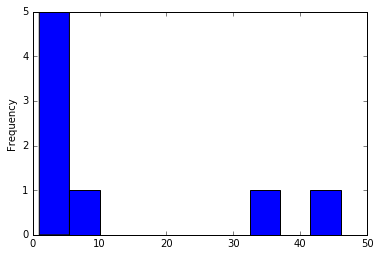

In [5]:
%matplotlib inline
# people_id histogram
train_input.people_id.value_counts().plot(kind='hist')

# people dataset transformation

- char_1,2,4,5,6,7,8,9 (type n) will be one-hot encoded with all distinct values
- char_10-37 (True/False) will be transformed to 0/1
- char_3 do filter with threshold 0.01
- char_38 is continuous variable
- group_1 is transformed to 0/1

In [ ]:
# Using DictVectorizer, convert string format categorical data to one-hot encoding


0    type 2
1    type 2
2    type 2
3    type 2
4    type 2
Name: char_1, dtype: object
<type 'list'>
{'char_8': 'type 2', 'char_33': False, 'char_38': 36, 'char_19': False, 'char_18': False, 'char_17': False, 'char_16': True, 'char_15': False, 'char_14': True, 'char_13': True, 'char_12': False, 'char_11': False, 'char_10': True, 'char_32': False, 'char_31': True, 'char_9': 'type 2', 'char_30': True, 'char_7': 'type 11', 'char_6': 'type 3', 'char_5': 'type 5', 'char_4': 'type 5', 'char_2': 'type 2', 'char_1': 'type 2', 'char_26': False, 'char_27': True, 'char_24': False, 'char_25': False, 'char_22': False, 'char_23': False, 'char_20': False, 'char_21': True, 'char_35': True, 'char_28': True, 'char_29': False, 'char_37': False, 'char_34': True, 'char_36': True}
<type 'numpy.ndarray'>
(9999, 117)
[[  1.   0.   0.   1.   1.   0.   1.   0.   0.   0.   0.   1.   0.   1.
    0.   0.   0.   0.   0.   1.   1.   0.   0.   1.   0.   1.   1.   0.
    0.   1.   1.   1.   0.  36.   0.   0.   0.   0

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,people_id
0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,1,1,0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,ppl_100
1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,0,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,ppl_100002
2,1,1,1,1,1,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,1,1,1,1,0,1,1,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,ppl_100003
3,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,ppl_100004
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,84,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,ppl_100006


In [21]:
people_input = pd.read_csv('dataset/people_t.csv', keep_default_na=True).fillna(-999)
people_feat = people_input[people_input.columns.difference(['people_id','date','char_38','group_1'])]
feat_dict_map = {}

In [41]:
#char_3, ..., char_9 value format is 'type n'
people_feat.apply(lambda x: x.value_counts()).T.stack()

char_1   type 1      793.0
         type 2     9206.0
char_10  False      7431.0
         True       2568.0
char_11  False      7845.0
         True       2154.0
char_12  False      7580.0
         True       2419.0
char_13  False      6299.0
         True       3700.0
char_14  False      7395.0
         True       2604.0
char_15  False      7336.0
         True       2663.0
char_16  False      7177.0
         True       2822.0
char_17  False      7069.0
         True       2930.0
char_18  False      8105.0
         True       1894.0
char_19  False      7094.0
         True       2905.0
char_2   type 1      793.0
         type 2     4137.0
         type 3     5069.0
char_20  False      7688.0
         True       2311.0
char_21  False      7084.0
         True       2915.0
char_22  False      7043.0
         True       2956.0
char_23  False      7013.0
         True       2986.0
char_24  False      8074.0
         True       1925.0
char_25  False      6728.0
         True       3271.0
c

In [24]:
# s0: people char_3 - filter and convert 
print people_input.char_3.head()
pc3_cnt = people_input.char_3.value_counts(normalize=True)
pc3_filtered = pc3_cnt[pc3_cnt>0.01]
print sum(pc3_filtered)
pc3_cols = pc3_filtered.index.values
print pc3_cols
pc3_cols.sort()
print pc3_cols

pc3_cnt_d = defaultdict(lambda: '0')
for k,v in enumerate(pc3_cols):
    pc3_cnt_d[v]=str(k+1)
print pc3_cnt_d

feat_dict_map['char_3']=pc3_cnt_d
print 'feat_dict_map:'
print feat_dict_map
print people_input.char_3.head()

0     type 5
1    type 28
2     type 4
3    type 40
4    type 40
Name: char_3, dtype: object
0.935093509351
['type 40' 'type 4' 'type 5' 'type 2' 'type 11' 'type 6' 'type 7' 'type 15'
 'type 9' 'type 1' 'type 19' 'type 8' 'type 21' 'type 10']
['type 1' 'type 10' 'type 11' 'type 15' 'type 19' 'type 2' 'type 21'
 'type 4' 'type 40' 'type 5' 'type 6' 'type 7' 'type 8' 'type 9']
defaultdict(<function <lambda> at 0x1150169b0>, {'type 19': '5', 'type 8': '13', 'type 9': '14', 'type 21': '7', 'type 15': '4', 'type 4': '8', 'type 5': '10', 'type 2': '6', 'type 11': '3', 'type 10': '2', 'type 1': '1', 'type 6': '11', 'type 40': '9', 'type 7': '12'})
feat_dict_map:
{'char_3': defaultdict(<function <lambda> at 0x1150169b0>, {'type 19': '5', 'type 8': '13', 'type 9': '14', 'type 21': '7', 'type 15': '4', 'type 4': '8', 'type 5': '10', 'type 2': '6', 'type 11': '3', 'type 10': '2', 'type 1': '1', 'type 6': '11', 'type 40': '9', 'type 7': '12'})}
0     type 5
1    type 28
2     type 4
3    type 40
4

In [25]:
# people char_38 - filter and analyze, no conversion is needed, will be treated as continuous variable
pc38_cnt = people_input.char_38.value_counts(normalize=True)
pc38_filtered = pc38_cnt[pc38_cnt>0.005]
print sum(pc38_filtered)


0.845184518452


In [27]:
# s1: people group_1 - filter and convert to one-hot encoding
pg1_cnt = people_input.group_1.value_counts(normalize=True)
pg1_filtered = pg1_cnt[pg1_cnt>0.01]
print sum(pg1_filtered)

pg1_cols = pg1_filtered.index.values
pg1_cols.sort()
print pg1_cols

pg1_cnt_d = defaultdict(lambda: '0')
for k,v in enumerate(pg1_cols):
    pg1_cnt_d[v]=str(k+1)
    
print pg1_cnt_d
feat_dict_map['group_1']=pg1_cnt_d
print feat_dict_map

0.413741374137
['group 17304']
defaultdict(<function <lambda> at 0x1150168c0>, {'group 17304': '1'})
{'group_1': defaultdict(<function <lambda> at 0x1150168c0>, {'group 17304': '1'}), 'char_3': defaultdict(<function <lambda> at 0x1150169b0>, {'type 19': '5', 'type 8': '13', 'type 9': '14', 'type 21': '7', 'type 15': '4', 'type 4': '8', 'type 5': '10', 'type 2': '6', 'type 11': '3', 'type 10': '2', 'type 1': '1', 'type 6': '11', 'type 40': '9', 'type 7': '12'})}


In [29]:

# - s2: char_1,2,4,5,6,7,8,9 (type n) will be one-hot encoded with all distinct values
s1_cols = ['char_1','char_2','char_4','char_5','char_6','char_7','char_8','char_9']
for col in s1_cols:
    col_vals = people_input[col].unique()
    col_vals.sort()
    col_d = defaultdict()
    for k,v in enumerate(col_vals):
        col_d[v]=k
    
    feat_dict_map[col]=col_d

print feat_dict_map


{'group_1': defaultdict(<function <lambda> at 0x1150168c0>, {'group 17304': '1'}), 'char_9': defaultdict(None, {'type 8': 7, 'type 9': 8, 'type 6': 5, 'type 7': 6, 'type 4': 3, 'type 5': 4, 'type 2': 1, 'type 3': 2, 'type 1': 0}), 'char_8': defaultdict(None, {'type 8': 7, 'type 6': 5, 'type 7': 6, 'type 4': 3, 'type 5': 4, 'type 2': 1, 'type 3': 2, 'type 1': 0}), 'char_7': defaultdict(None, {'type 18': 9, 'type 19': 10, 'type 14': 5, 'type 15': 6, 'type 16': 7, 'type 17': 8, 'type 10': 1, 'type 11': 2, 'type 12': 3, 'type 13': 4, 'type 8': 23, 'type 9': 24, 'type 6': 21, 'type 7': 22, 'type 4': 19, 'type 5': 20, 'type 2': 11, 'type 3': 18, 'type 1': 0, 'type 21': 13, 'type 20': 12, 'type 23': 15, 'type 22': 14, 'type 25': 17, 'type 24': 16}), 'char_6': defaultdict(None, {'type 6': 5, 'type 7': 6, 'type 4': 3, 'type 5': 4, 'type 2': 1, 'type 3': 2, 'type 1': 0}), 'char_5': defaultdict(None, {'type 8': 7, 'type 9': 8, 'type 6': 5, 'type 7': 6, 'type 4': 3, 'type 5': 4, 'type 2': 1, 'type

In [30]:
# - s3: char_10-37 (True/False) will be transformed to 0/1
s2_cols = ['char_10','char_11','char_12','char_13','char_14','char_15','char_16','char_17','char_18','char_19','char_20','char_21','char_22','char_23','char_24','char_25','char_26','char_27','char_28','char_29','char_30','char_31','char_32','char_33','char_34','char_35','char_36','char_37']
people_input[s2_cols]=people_input[s2_cols].astype(int)
print people_input.char_11.head()


0    0
1    0
2    1
3    1
4    0
Name: char_11, dtype: int64


In [13]:
for k,v in feat_dict_map.iteritems():
    print k, v
    people_input[k] = people_input[k].apply(lambda x: v.get(x))
    print people_input[k].head()

print (feat_dict_map['group_1']).get('g')
people_input.head()

group_1 defaultdict(<function <lambda> at 0x114c140c8>, {'group 17304': '1'})
0       1
1    None
2    None
3    None
4    None
Name: group_1, dtype: object
char_9 defaultdict(None, {'type 8': 7, 'type 9': 8, 'type 6': 5, 'type 7': 6, 'type 4': 3, 'type 5': 4, 'type 2': 1, 'type 3': 2, 'type 1': 0})
0    1
1    3
2    1
3    1
4    1
Name: char_9, dtype: int64
char_8 defaultdict(None, {'type 8': 7, 'type 6': 5, 'type 7': 6, 'type 4': 3, 'type 5': 4, 'type 2': 1, 'type 3': 2, 'type 1': 0})
0    1
1    1
2    1
3    1
4    1
Name: char_8, dtype: int64
char_7 defaultdict(None, {'type 18': 9, 'type 19': 10, 'type 14': 5, 'type 15': 6, 'type 16': 7, 'type 17': 8, 'type 10': 1, 'type 11': 2, 'type 12': 3, 'type 13': 4, 'type 8': 23, 'type 9': 24, 'type 6': 21, 'type 7': 22, 'type 4': 19, 'type 5': 20, 'type 2': 11, 'type 3': 18, 'type 1': 0, 'type 21': 13, 'type 20': 12, 'type 23': 15, 'type 22': 14, 'type 25': 17, 'type 24': 16})
0     2
1     2
2    20
3     7
4    23
Name: char_7, dtype: 

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,1,1,1,2021-06-29,10,20,4,2,2,...,0,1,1,0,0,1,1,1,0,36
1,ppl_100002,1,None,2,2021-01-06,None,24,4,2,2,...,0,1,1,1,1,1,1,1,0,76
2,ppl_100003,1,None,2,2022-06-10,8,23,4,1,20,...,0,0,1,1,1,1,0,1,1,99
3,ppl_100004,1,None,2,2022-07-20,9,17,8,3,7,...,1,1,1,1,1,1,1,1,1,76
4,ppl_100006,1,None,2,2022-07-27,9,17,8,2,23,...,0,0,1,0,0,0,1,1,0,84


In [14]:
for k,v in feat_dict_map.iteritems():
    print k, v

group_1 defaultdict(<function <lambda> at 0x114c140c8>, {'group 17304': '1'})
char_9 defaultdict(None, {'type 8': 7, 'type 9': 8, 'type 6': 5, 'type 7': 6, 'type 4': 3, 'type 5': 4, 'type 2': 1, 'type 3': 2, 'type 1': 0})
char_8 defaultdict(None, {'type 8': 7, 'type 6': 5, 'type 7': 6, 'type 4': 3, 'type 5': 4, 'type 2': 1, 'type 3': 2, 'type 1': 0})
char_7 defaultdict(None, {'type 18': 9, 'type 19': 10, 'type 14': 5, 'type 15': 6, 'type 16': 7, 'type 17': 8, 'type 10': 1, 'type 11': 2, 'type 12': 3, 'type 13': 4, 'type 8': 23, 'type 9': 24, 'type 6': 21, 'type 7': 22, 'type 4': 19, 'type 5': 20, 'type 2': 11, 'type 3': 18, 'type 1': 0, 'type 21': 13, 'type 20': 12, 'type 23': 15, 'type 22': 14, 'type 25': 17, 'type 24': 16})
char_6 defaultdict(None, {'type 6': 5, 'type 7': 6, 'type 4': 3, 'type 5': 4, 'type 2': 1, 'type 3': 2, 'type 1': 0})
char_5 defaultdict(None, {'type 8': 7, 'type 9': 8, 'type 6': 5, 'type 7': 6, 'type 4': 3, 'type 5': 4, 'type 2': 1, 'type 3': 2, 'type 1': 0})
ch

In [15]:
# do value counts for each column of dataframe
feat_val_cnts = feats.apply(lambda x: x.value_counts()).T.stack()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [16]:
# value counts for multi-column combinations, this is a testcase for one combination
test_feat = train_input[['activity_category', 'outcome']]
sf = test_feat.groupby(['activity_category', 'outcome']).size()
sf

activity_category  outcome
1                  0           1
2                  0          12
                   1          25
3                  0           1
                   1           3
4                  0           3
                   1          13
5                  0          36
                   1           5
dtype: int64

In [17]:
from IPython.display import clear_output
# for all features, do value counts for multi-column (pairing with outcome col) combinations
cols = feats.columns.difference(['outcome','date','char_10'])  #['char_10']
print cols
for c in cols:
    pair_col = [c, 'outcome']
    pair_val_cnt = feats[pair_col].groupby(pair_col).size()
    print '--------------pair-%s' % '+'.join(pair_col)+'---------'
    print pair_val_cnt

clear_output()

In [18]:
train_input.outcome.value_counts()

0    53
1    46
Name: outcome, dtype: int64